In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
%autosave 0 

Autosave disabled


In [2]:


from utils_hmm import *



the rosdep view is empty: call 'sudo rosdep init' and 'rosdep update'


In [20]:
fast_load=True


if fast_load:
    datamugroso=pd.read_csv('fast_load.csv')
    #datamugroso=pd.read_csv('pddata.csv')
    data= datamugroso.iloc[:,1:].sample(n=10000,axis=0)
    #lecs=data[data.Vk==lec_leida].sample(n=10,axis=0).iloc[:,:-6]


####CHOOSE LECS CORRECTLY    
lecs=data.iloc[:,:-6]

In [21]:
lecs.shape

(10000, 721)

In [8]:
data.describe()


,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.030849,2.040074,2.037868,2.034175,2.032842,2.029221,2.025833,2.021951,2.019408,2.014062,...,1.742481,1.748795,1.754274,1.760882,1.254364,1.845420,-1.105695,8.945200,111.866000,111.866000
std,0.976265,0.986408,0.986425,0.985323,0.985525,0.983232,0.980292,0.985628,0.988993,0.997400,...,0.921402,0.923264,0.924936,0.927556,1.050891,1.391596,1.664855,5.976853,78.327464,78.327464
min,0.252545,0.252523,0.252773,0.253031,0.253298,0.251829,0.244371,0.244635,0.244909,0.245191,...,0.309927,0.310498,0.311081,0.311678,-0.341757,-0.135209,-3.141575,0.000000,0.000000,0.000000
25%,1.308345,1.303556,1.301624,1.297370,1.292761,1.295915,1.301241,1.293569,1.299724,1.304204,...,0.964564,0.972147,0.976694,0.982953,0.260112,0.296737,-2.350999,3.000000,35.000000,35.000000
50%,1.932425,1.950014,1.945736,1.929611,1.922650,1.916783,1.913110,1.905449,1.893144,1.894198,...,1.566652,1.570461,1.572015,1.571261,1.348538,2.335004,-1.672351,9.000000,110.000000,110.000000
75%,2.499331,2.518970,2.515013,2.505539,2.504048,2.492309,2.496795,2.498063,2.479488,2.486257,...,2.556174,2.560627,2.564067,2.570051,2.270556,3.229952,-0.031383,14.000000,177.000000,177.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,2.805670,3.919113,3.135928,19.000000,255.000000,255.000000


In [9]:
lecs=np.clip(lecs,0,5)
data.iloc[:,:-6]=lecs

In [10]:
data.describe()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.030849,2.040074,2.037868,2.034175,2.032842,2.029221,2.025833,2.021951,2.019408,2.014062,...,1.742481,1.748795,1.754274,1.760882,1.254364,1.845420,-1.105695,8.945200,111.866000,111.866000
std,0.976265,0.986408,0.986425,0.985323,0.985525,0.983232,0.980292,0.985628,0.988993,0.997400,...,0.921402,0.923264,0.924936,0.927556,1.050891,1.391596,1.664855,5.976853,78.327464,78.327464
min,0.252545,0.252523,0.252773,0.253031,0.253298,0.251829,0.244371,0.244635,0.244909,0.245191,...,0.309927,0.310498,0.311081,0.311678,-0.341757,-0.135209,-3.141575,0.000000,0.000000,0.000000
25%,1.308345,1.303556,1.301624,1.297370,1.292761,1.295915,1.301241,1.293569,1.299724,1.304204,...,0.964564,0.972147,0.976694,0.982953,0.260112,0.296737,-2.350999,3.000000,35.000000,35.000000
50%,1.932425,1.950014,1.945736,1.929611,1.922650,1.916783,1.913110,1.905449,1.893144,1.894198,...,1.566652,1.570461,1.572015,1.571261,1.348538,2.335004,-1.672351,9.000000,110.000000,110.000000
75%,2.499331,2.518970,2.515013,2.505539,2.504048,2.492309,2.496795,2.498063,2.479488,2.486257,...,2.556174,2.560627,2.564067,2.570051,2.270556,3.229952,-0.031383,14.000000,177.000000,177.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,2.805670,3.919113,3.135928,19.000000,255.000000,255.000000


In [11]:
from sklearn.cluster import AffinityPropagation


In [12]:
af = AffinityPropagation(damping=.8).fit(lecs)
#db=DBSCAN().fit(lecs)

In [13]:
data['Vk_aff']=af.labels_
ccvk_aff= af.cluster_centers_

In [14]:
data[['Vk','Vk_aff']]

,Vk,Vk_aff
17807,58,26
13321,177,68
4461,251,235
704,44,0
16748,245,188
20333,2,23
13203,177,68
1235,11,184
5415,30,9
9899,148,33


Text(0.5,0.98,u'Affinity Prop')

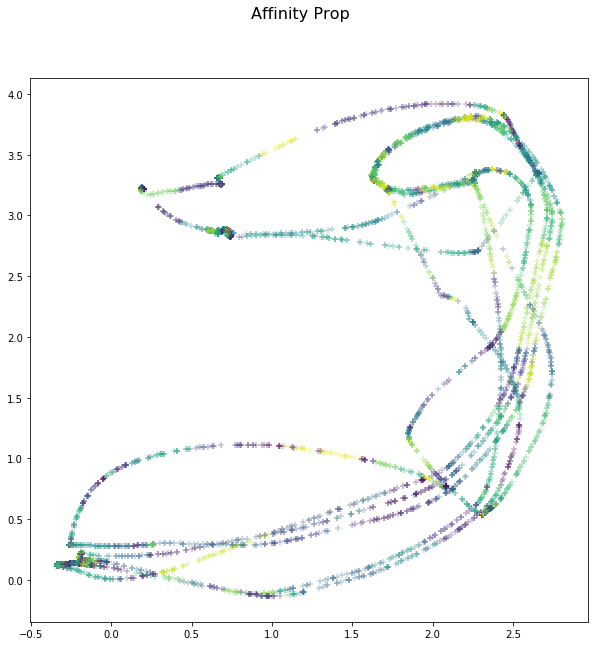

In [15]:
ccvk=np.load('ccvk.npy')
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff,alpha=.313)
fig.suptitle('Affinity Prop', fontsize=16)




#cords3=path_to_xy(np.arange(0,len(cc)),cc)
#ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')




In [16]:
data.Vk_aff.value_counts().index[1] 


184

In [17]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec_aff_leida= data.Vk_aff.value_counts().index[1]
lec=data[data.Vk_aff==lec_aff_leida].iloc[0,:-6].values

#lec_Kmn_leida= data.Vk.value_counts().index[1]

#lec=data.iloc[index_forlec,:-6].values
lec_Kmn_leida=np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
lec_Kmn_leida,lec_aff_leida



(11, 184)

In [18]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [19]:
#ccvk=cc
cc=ccvk
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_aff_leida]
vec_obs=cc[lec_Kmn_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs_aff
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'Affinity Prop')
ax1.legend()

ValueError: operands could not be broadcast together with shapes (721,) (722,) 

In [ ]:
lec_aff_leida= data.Vk_aff.value_counts().index[25]
print (lec_aff_leida)

In [ ]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec=data[data.Vk_aff==lec_aff_leida].iloc[0,:-6].values

lec_Kmn_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()

#lec=data.iloc[index_forlec,:-6].values

#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]

print(lec_aff_leida, lec_Kmn_leida)

In [ ]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [ ]:
#ccvk=cc
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_aff_leida]
vec_obs=cc[lec_Kmn_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs_aff
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'Affinity Prop')
ax1.legend()

In [ ]:
from joblib import dump, load
dump(af, 'aff_prop_class.joblib',protocol=2) 

In [ ]:
clf=load('aff_prop_class.joblib') ##PYTHON VERSION 2 

In [ ]:
lecs=data.iloc[:,:-6]
from sklearn.cluster import OPTICS
clust = OPTICS(min_samples=10)

In [ ]:
#####clust.fit(lecs)###NO PREDICT FUNC SO UNFEASIBLE$

In [ ]:
pd.Series(clust.labels_).describe()
data.Vk_aff=clust.labels_

In [ ]:
dump(clust, 'OPTICS_class.joblib',protocol=2) 

In [ ]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec_leida= data.Vk_aff.value_counts().index[1]
#lec=data.iloc[index_forlec,:-6].values
lec=data[data.Vk_aff==lec_leida].iloc[0,:-6].values
lec_leida

In [ ]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk_aff[lec_leida]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real 15 random reads and their cuantized versions OPTICS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
#ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [ ]:
lec_leida= data.Vk_aff.value_counts().index[3]

lec=data[data.Vk_aff==lec_leida].iloc[0,:-6].values

lec_leida

In [ ]:
ccvk=cc
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
#ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'OPTICS')
ax1.legend()

In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk_aff[lec_leida]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real 15 random reads and their cuantized versions OPTICS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [ ]:
dump(af, 'aff_prop_class.joblib',protocol=2) 

In [ ]:
lecs=data.iloc[:,:-6]
from sklearn.cluster import FeatureAgglomeration
agglo = FeatureAgglomeration(n_clusters=15)

In [ ]:
agglo.fit(lecs)

In [ ]:
lecs_reduced=agglo.fit_transform(lecs)

In [ ]:
lecs_reduced.shape

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
pca =PCA(n_components=15)
pca.fit(lecs)

In [ ]:
pca.transform(lecs).shape

In [ ]:
###TO DO GRID SEARCH PCA. FEATURE AGGL

In [ ]:
##LBG----- REading Doc's centroids
f=open('vq_images_sonar_32.dat')
contents=f.readlines()
cc_lgbt=[]
for char in contents:
    words=char.split()
    cc_lgbt.append(words[2:])
cc_buzo=[]
for i in range(32):
    cc_buzo.append(np.asarray(cc_lgbt[i]))
cc_buzo=np.asarray(cc_buzo)


In [ ]:
cc_buzo.shape

In [ ]:
len(cc_buzo)

In [ ]:
import joblib

In [ ]:
import sys


In [ ]:
sys.path.append('/usr/lib/python2.7/')